# Library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import collections
import pandas as pd

from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, classification_report # 정오분류표
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 
from sklearn.metrics import roc_curve, auc, roc_auc_score,classification_report,confusion_matrix  # ROC곡선 그리기
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import learning_curve, validation_curve # 학습곡선, 검증곡선
from sklearn.model_selection import GridSearchCV, cross_val_score  # 하이퍼파라미터 튜닝, 교차타당도

In [3]:
%matplotlib inline
import os

from xgboost import plot_tree

import matplotlib.pyplot as plt

from matplotlib.pylab import rcParams

# Data Load

In [19]:
데이터 불러오기

In [21]:
# 앞에서 부터 5줄 보기

,Open,High,Low,Close,Adj Close,Volume,S&P500,SOX,VIX,KOSPI,...,RASD10,MACD,CCI60,ATR14,MTM3,ROC60,ROC90,WPR14,ADXR14,ADX14
Date,,,,,,,,,,,,,,,,,,,,,
2006-06-29,38000.0,40500.0,37500.0,39200.0,36039.308594,1195650,1272.869995,446.170013,13.03,1263.020020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-06-30,39600.0,40950.0,39000.0,40900.0,37602.242188,472510,1270.199951,441.720001,13.08,1295.150024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-07-03,41300.0,41700.0,39900.0,41400.0,38061.925781,207420,1280.189941,446.010010,13.05,1294.609985,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-07-04,41550.0,44300.0,41550.0,44000.0,40452.292969,277000,NaN,NaN,NaN,1285.920044,...,NaN,NaN,NaN,NaN,4800.0,NaN,NaN,NaN,NaN,NaN
2006-07-05,42700.0,44000.0,42700.0,44000.0,40452.292969,137000,1270.910034,431.899994,14.15,1279.849976,...,NaN,NaN,NaN,NaN,3100.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 뒤에서 부터 다섯줄 보기

In [ ]:
# 기초 통계량

In [ ]:
# 정보보기

In [23]:
origin_df.shape # 열,행 

(3861, 28)

# Preprocessing

# 주가 전망을 어떻게 표현할까?

* 오늘의 종가와 내일의 종가의 차이를 값으로 갖는 열 만들기

In [75]:
문제

In [76]:
origin_df[['Close','shift','target']].head()

,Close,shift,target
Date,,,
2006-06-29,39200.0,43000.0,1
2006-06-30,40900.0,43050.0,1
2006-07-03,41400.0,40500.0,0
2006-07-04,44000.0,40500.0,0
2006-07-05,44000.0,40800.0,0


In [41]:
origin_df[['Close','shift','target']].tail()

,Close,shift,target
Date,,,
2022-01-24,154500.0,NaN,0
2022-01-25,150500.0,NaN,0
2022-01-26,150500.0,NaN,0
2022-01-27,149500.0,NaN,0
2022-01-28,155000.0,NaN,0


* 해당일의 종가를 제외하고 다음날부터 n일동안의 평균을 구해서 열 만들기

In [77]:
문제

In [78]:
origin_df[['Close','shift','target']].head()

,Close,shift,target
Date,,,
2006-06-29,39200.0,43925.0,1
2006-06-30,40900.0,44140.0,1
2006-07-03,41400.0,44050.0,1
2006-07-04,44000.0,43700.0,0
2006-07-05,44000.0,43380.0,0


Text(0.5, 1.0, 'positive label ratio')

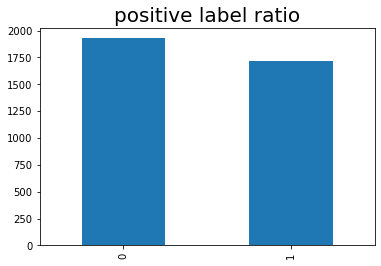

In [79]:
# 양성 비율 그림 그리기

In [87]:
df = # 특정 날짜의 데이터

In [88]:
1.결측치 제거하려면?
2.결측치를 이전값으로 채우려면?

Object `제거하려면` not found.
Object `채우려면` not found.


# trn tst

In [89]:
X = # shift와 target을 제거한 X만들기

# Min Max Scaler를 사용해 스케일링
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

y = #target을 y로 지정하기

In [90]:
# trn, tst 나누기

In [91]:
model = XGBClassifier(learning_rate= 0.3, 
                  max_depth= 6, 
                  n_estimators= 110,
                   booster='gbtree',
                    objective='binary:logistic',
                  feature_names = X.columns.to_list())

# 모델 학습하기
# 예측하기 

/Users/jihyun/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:30:38] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { feature_names } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:30:38] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [92]:
# 정확도 찍어보기

86.61
